# **Problem Statement**

MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged.

## **Business Context**

## **Objective**

To analyze the insurance data, identify patterns, build a linear regression model to predict insurance premium amount, and to identify the factors contributing to changes in premium.

## Data Dictionary ##

* age: age of the policyholder
* sex: gender of the policyholder
* bmi: Body Mass Index of the policyholder
* children: number of children of the policyholder
* smoker: whether the policyholder is a smoker or not
* region: region where the policyholder belongs to
* charges: premium charged to the policyholder

# **Installing and Importing the necessary libraries**

In [1]:
# Uncomment this step if the necessry libraries are not installed.
#!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

In [2]:
# To load and manipulate data
import pandas as pd
import numpy as np

# To visualize and perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# To Preprocess the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# To split the data into test and training sts.
from sklearn.model_selection import train_test_split

# To build a linear regression model
from sklearn.linear_model import LinearRegression

# To evaluate the model prformance and variability explanation
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Loading the Data

In [3]:
# Mount google drive to access the drive / files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the insurance.csv file
premium = pd.read_csv('/content/drive/My Drive/PGP-AIML/M2 : Machine Learning/Week1/insurance.csv')

# Copy the insurance data into a dataframe
df = premium.copy()

# Data Overview

## Checking the first 5 rows the dataset.

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking the shape of the dataset.

In [7]:
df.shape

(1338, 7)

The dataset has 1338 rows and 7 columns

## Checking the attribute types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 4 numerical and 3 categorical variables in the data

## Checking for Statistical summary of the data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Youngest customer is 18 years, Oldest customer is 64 years and average customer age 39 years.
* Insurance premiums range from \$1,120 to \$63,770 with an average of \$13,270


## Check for missing values

In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


* There are no missing values in the data.

## Check for Duplicate records

In [12]:
df.duplicated().sum()

np.int64(1)

There is one duplicate record.



In [13]:
# Remove the duplicate records.

df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Duplicate record is dropped, now the dataset has 1337 rows and 7 columns

## Check for unique values of categorical features.

In [35]:
# Unique values for sex.
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [36]:
# Unique values for region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
# Unique values for smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

# Exploratory Data Analysis

## Univariate Analysis

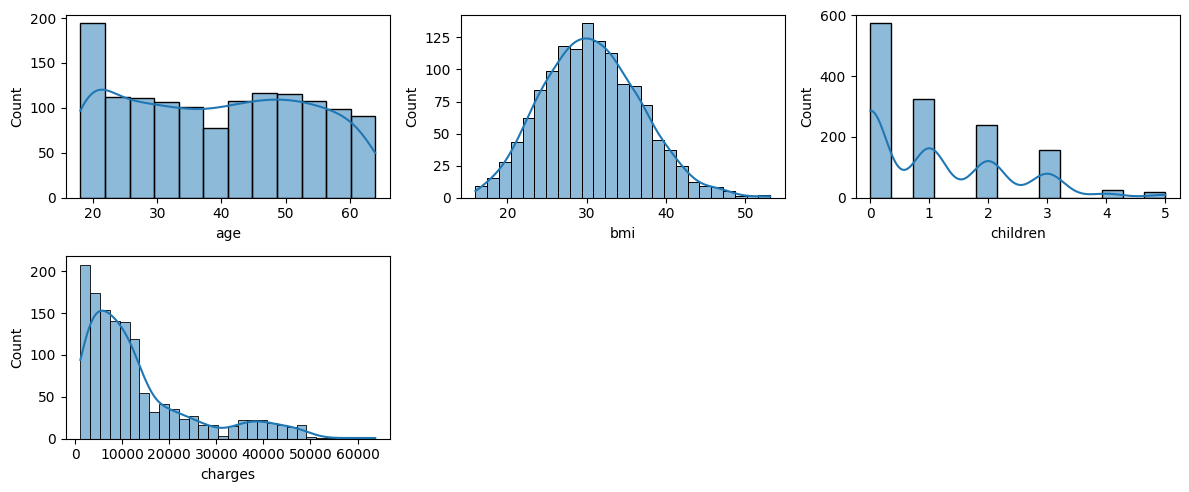

In [20]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(12,7))

for i, feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=df, x=feature, kde=True)

plt.tight_layout()
plt.show()


* The age data shows a uniform distribution.
* bmi data is normally distributed.
* Children data shows gradual downtrend from no children to 5 childern.
* Charges data exhibit right skewed distribution


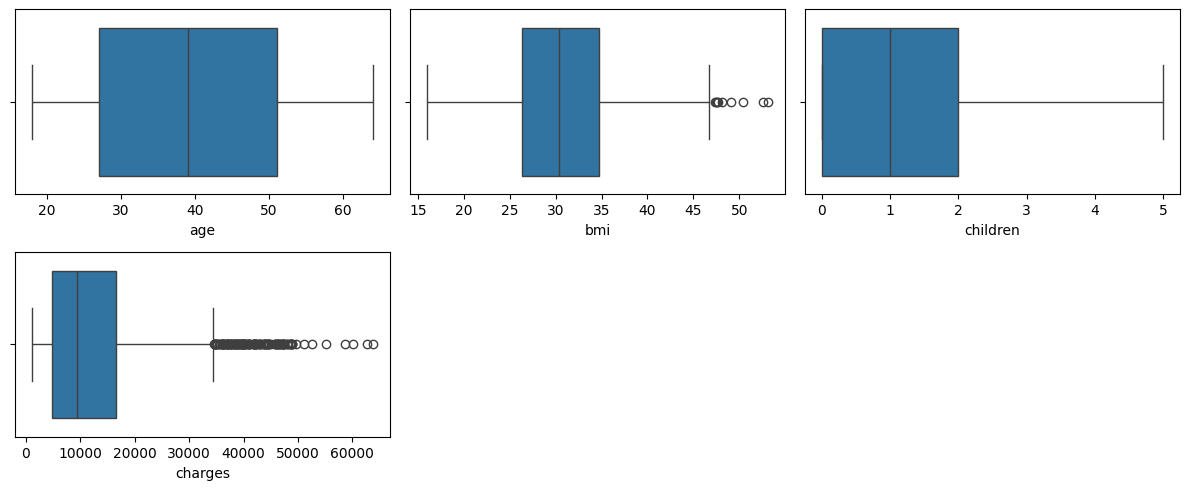

In [23]:
# Review boxplots for outliers

plt.figure(figsize=(12,7))
for i,feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=df, x=feature)

plt.tight_layout()
plt.show()

* There are some outliers in bmi and charges.

In [24]:
# Check categorical variables data

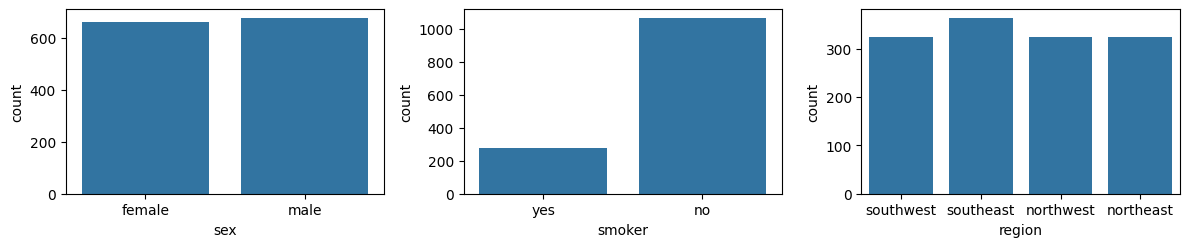

In [26]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(12,7))

for i, feature in enumerate(categorical_features):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df, x=feature)

plt.tight_layout()
plt.show()

* The customers are equally distributed between male and female.
* There are significant number of non-smokers in the data.
* The customers are equally distributed across all regions.

## Bivariate Analysis

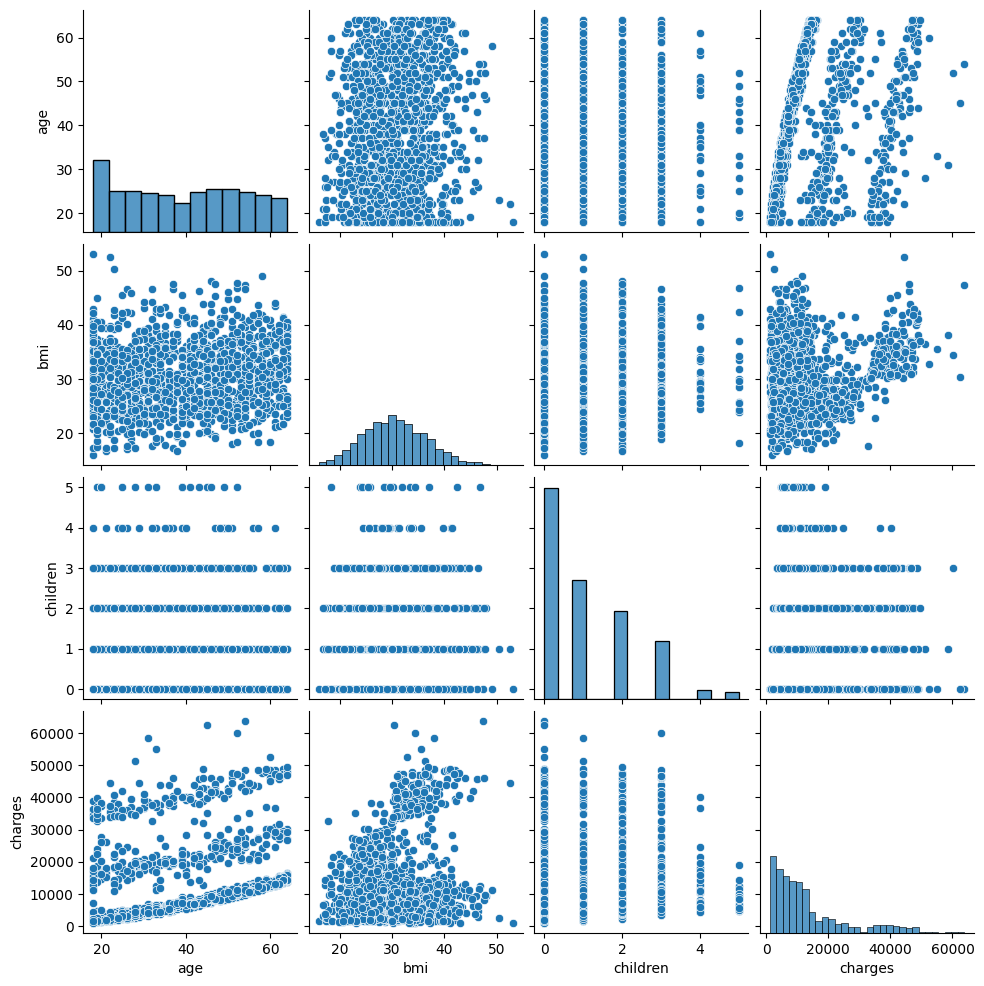

In [27]:
sns.pairplot(df)

* Chargers seems to be positively correlated with age.
* There seems to no correlation between sales and BMI, Children.
* There is no correlation between age and BMI.

<Axes: >

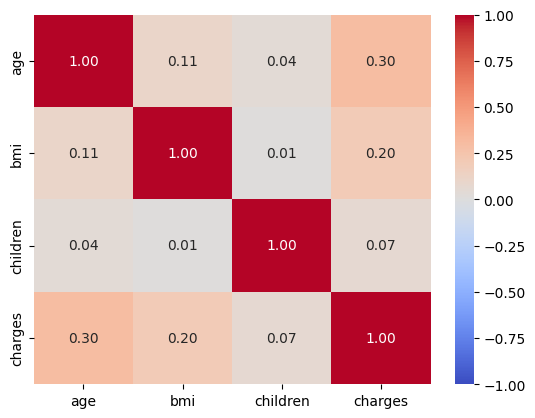

In [32]:
# Check the heatmap to review the strength and direction of correlation.
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='0.2f')

* Age and BMI shows positive correlation with Charges, although its strong.
* bmi and age have weak positive correlation.


<Axes: xlabel='sex', ylabel='charges'>

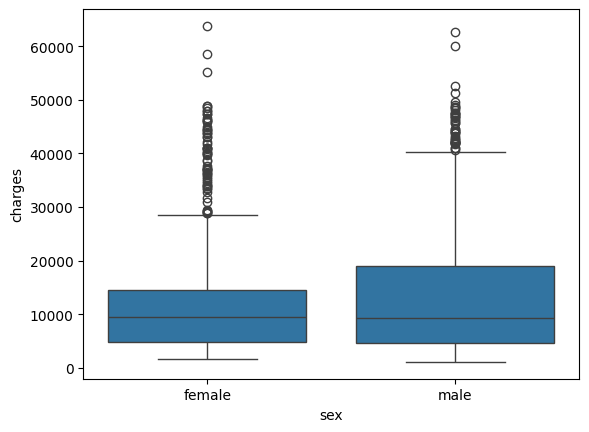

In [33]:
# Charges by sex

sns.boxplot(data=df, x='sex', y='charges')

* Male customers seem to have slightly higher premiums

<Axes: xlabel='region', ylabel='charges'>

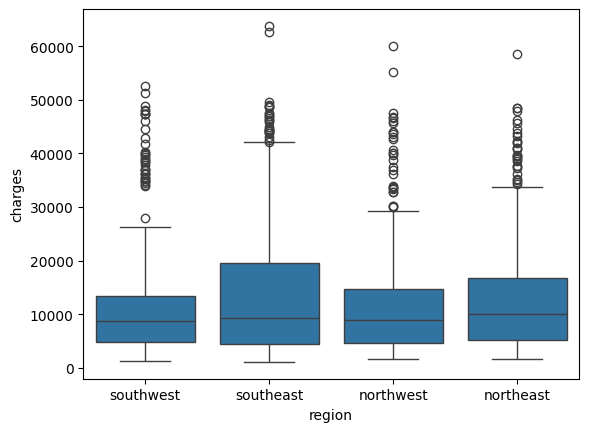

In [144]:
# Sales vs Region.

sns.boxplot(data=df, x='region', y='charges')

* Premium charges in southeast seems to be slightly higher compared to other regions.
* All regions have some outliers.

# Data preperation for modeling

In [38]:
X = df.drop('charges', axis=1)
y = df['charges']

In [39]:
# split the data into training and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Model Building

## Linear Regression - Charges vs Age

In [40]:
ind_vars1 = ['age']

linear_reg1 = LinearRegression()
linear_reg1.fit(X_train[ind_vars1], y_train)

LinearRegression()

In [43]:
print("charges =", linear_reg1.coef_[0] , "*(age) +", linear_reg1.intercept_ )

charges = 262.31687344803004 *(age) + 2998.5777306780055


## Linear Regression - Charges vs bmi

In [44]:
ind_vars2 = ['bmi']

linear_reg2 = LinearRegression()
linear_reg2.fit(X_train[ind_vars2], y_train)

LinearRegression()

In [45]:
print("charges =", linear_reg2.coef_[0] , "*(bmi) +", linear_reg2.intercept_ )

charges = 366.1227854090465 *(bmi) + 2001.129553376477


# Linear Regression - charges vs age, bmi, smoker

In [66]:
# Encode smoker, sex into a numerical variable
label_encoder = LabelEncoder()
X['encoded_smoker'] = label_encoder.fit_transform(X['smoker'])
X['encoded_sex'] = label_encoder.fit_transform(X['sex'])


In [72]:
X.head()

,age,sex,bmi,children,smoker,region,encoded_smoker,encoded_sex
0,19,female,27.900,0,yes,southwest,1,0
1,18,male,33.770,1,no,southeast,0,1
2,28,male,33.000,3,no,southeast,0,1
3,33,male,22.705,0,no,northwest,0,1
4,32,male,28.880,0,no,northwest,0,1


In [67]:
# Prepare data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [68]:
ind_vars3 = ['age', 'bmi', 'encoded_smoker']

linear_reg3 = LinearRegression()
linear_reg3.fit(X_train[ind_vars3], y_train)

LinearRegression()

In [69]:
equation = "charges = " + str(linear_reg3.intercept_) + " + " + str(linear_reg3.coef_[0]) + "*(" + str(ind_vars3[0]) + ")"

for i in range(1, len(ind_vars3)):
  equation += " + " + str(linear_reg3.coef_[i]) + "*(" + str(ind_vars3[i]) + ")"

print(equation)

charges = -11052.767949478231 + 258.9624310868775*(age) + 303.37204686628655*(bmi) + 23723.48386216958*(encoded_smoker)


## Linear Regression - charges vs age, bmi, smoker, sex

---



In [70]:
ind_vars4 = ['age', 'bmi', 'encoded_smoker', 'encoded_sex']

linear_reg4 = LinearRegression()
linear_reg4.fit(X_train[ind_vars4], y_train)

LinearRegression()

In [73]:
equation = "charges = " + str(linear_reg4.intercept_) + " + (" + str(linear_reg4.coef_[0]) + ")*(" + str(ind_vars4[0]) + ")"

for i in range(1, len(ind_vars4)):
  equation += " + (" + str(linear_reg4.coef_[i]) + ")*(" + str(ind_vars4[i]) + ")"

print(equation)

charges = -10968.564584551787 + (258.93890006147217)*(age) + (304.0132916062502)*(bmi) + (23742.653761779664)*(encoded_smoker) + (-209.86543507372627)*(encoded_sex)


## Linear Regression - charges vs age, bmi, smoker, sex, region

---



In [89]:
# Encode the region using one hot encoding

X = pd.get_dummies(X, columns=['region'], drop_first=True)


KeyError: "None of [Index(['region'], dtype='object')] are in the [columns]"

In [94]:
X['region_northwest'] = X['region_northwest'].astype(float)
X['region_southeast'] = X['region_southeast'].astype(float)
X['region_southwest'] = X['region_southwest'].astype(float)

In [99]:
X.head()

,age,bmi,children,encoded_smoker,encoded_sex,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,1.0,0.0
3,33,22.705,0,0,1,1.0,0.0,0.0
4,32,28.880,0,0,1,1.0,0.0,0.0


In [98]:
X = X.drop('sex', axis=1)
X = X.drop('smoker', axis=1)


In [101]:
# split the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [102]:
linear_reg5 = LinearRegression()
linear_reg5.fit(X_train, y_train)

LinearRegression()

In [109]:
equation = "charges = " +  str(linear_reg5.intercept_) + " + (" + str(linear_reg5.coef_[0]) + ")*(" + str(X_train.columns.tolist()[0]) + ")"

for i in range(1, X_train.shape[1]):
  equation += " + " +  " (" + str(linear_reg5.coef_[i]) + ")*(" + str(X_train.columns.tolist()[i]) + ")"

print(equation)

charges = -11297.610008539417 + (257.4902466901145)*(age) +  (321.6218927794259)*(bmi) +  (408.06102001187844)*(children) +  (23786.48604536167)*(encoded_smoker) +  (-242.15306559164412)*(encoded_sex) +  (-396.0965635504705)*(region_northwest) +  (-1038.3758796506952)*(region_southeast) +  (-903.0330077796885)*(region_southwest)


# Model Performance Evaluation

In [112]:
# compute adjusted R square
def adjusted_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]

  return 1 - ((1-r2)*(n-1)/(n-k-1))

# Compute Model Performance
def compute_model_performance(model, predictors, targets):
  """
  Function to compute the model performance

  model: Regression model
  predictors: Input features
  targets: Output values.
  """

  y_pred = model.predict(predictors)
  mae = mean_absolute_error(targets, y_pred)
  rmse = np.sqrt(mean_squared_error(targets, y_pred))
  mape = mean_absolute_percentage_error(targets, y_pred)
  r2 = r2_score(targets, y_pred)
  adjusted_r2 = adjusted_r2_score(predictors, targets, y_pred)

  df_perf = pd.DataFrame({
      "mae" : mae,
      "rmse" : rmse,
      "mape" : mape,
      "r_square": r2,
      "adjusted_r_square": adjusted_r2
  },
  index=[0],
  )

  return df_perf



## Model performance of Charges vs Age

In [113]:
linear_reg1_train_perf = compute_model_performance(linear_reg1, X_train[ind_vars1], y_train)
linear_reg1_train_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,9059.93913,11507.934559,1.142867,0.091988,0.091138


In [114]:
linear_reg1_test_perf = compute_model_performance(linear_reg1, X_test[ind_vars1], y_test)
linear_reg1_test_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,9070.624617,11725.559392,1.176695,0.078991,0.075529


## Model performance of Charges vs BMI\

In [117]:
linear_reg2_train_perf = compute_model_performance(linear_reg2, X_train[ind_vars2], y_train)
linear_reg2_train_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,9208.293391,11866.914323,1.491323,0.034455,0.033551


In [119]:
linear_reg2_test_perf = compute_model_performance(linear_reg2, X_test[ind_vars2], y_test)
linear_reg2_test_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,8881.913272,11863.69251,1.548759,0.057164,0.053619


## Model performance of Charges vs Age, BMI and Smoker




In [121]:
linear_reg3_train_perf = compute_model_performance(linear_reg3, X_train[ind_vars3], y_train)
linear_reg3_train_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,4212.974283,6099.215096,0.430676,0.744939,0.744221


In [122]:
linear_reg3_test_perf = compute_model_performance(linear_reg3, X_test[ind_vars3], y_test)
linear_reg3_test_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,4108.16545,6025.406712,0.42541,0.756797,0.754033


## Model performance of Charges vs Age, BMI, Smoker and Sex


In [124]:
linear_reg4_train_perf = compute_model_performance(linear_reg4, X_train[ind_vars4], y_train)
linear_reg4_train_perf


,mae,rmse,mape,r_square,adjusted_r_square
0,4214.85958,6098.318855,0.430652,0.745014,0.744056


In [125]:
linear_reg4_test_perf = compute_model_performance(linear_reg4, X_test[ind_vars4], y_test)
linear_reg4_test_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,4107.194966,6028.933908,0.424148,0.756512,0.752809


## Model performance of Charges vs Age, BMI, Smoker, Sex, and Region


In [128]:
linear_reg5_train_perf = compute_model_performance(linear_reg5, X_train, y_train)
linear_reg5_train_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,4168.751119,6065.29112,0.412364,0.747768,0.745866


In [129]:
linear_reg5_test_perf = compute_model_performance(linear_reg5, X_test, y_test)
linear_reg5_test_perf

,mae,rmse,mape,r_square,adjusted_r_square
0,4051.858767,5956.454718,0.405807,0.762331,0.75499


In [137]:
print(ind_vars1)
print(ind_vars2)
print(ind_vars3)
print(ind_vars4)


['age']
['bmi']
['age', 'bmi', 'encoded_smoker']
['age', 'bmi', 'encoded_smoker', 'encoded_sex']


# Model Performance Comparison

In [139]:
models_train_comp_df = pd.concat(
    [linear_reg1_train_perf.T,
    linear_reg2_train_perf.T,
    linear_reg3_train_perf.T,
    linear_reg4_train_perf.T,
    linear_reg5_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression - Charges vs Age",
    "Linear Regression - Charges vs BMI",
    "Linear Regression - Charges vs Age, BMI, Smoker",
    "Linear Regression - Charges vs Age, BMI, Smoker, Sex",
    "Linear Regression - Charges vs Age, BMI, Smoker, Sex,Region"
]

models_train_comp_df


,Linear Regression - Charges vs Age,Linear Regression - Charges vs BMI,"Linear Regression - Charges vs Age, BMI, Smoker","Linear Regression - Charges vs Age, BMI, Smoker, Sex","Linear Regression - Charges vs Age, BMI, Smoker, Sex,Region"
mae,9059.939130,9208.293391,4212.974283,4214.859580,4168.751119
rmse,11507.934559,11866.914323,6099.215096,6098.318855,6065.291120
mape,1.142867,1.491323,0.430676,0.430652,0.412364
r_square,0.091988,0.034455,0.744939,0.745014,0.747768
adjusted_r_square,0.091138,0.033551,0.744221,0.744056,0.745866


In [140]:
df['log_bmi'] = np.log(df['bmi'])

In [141]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,3.363149


<Axes: xlabel='log_bmi', ylabel='Count'>

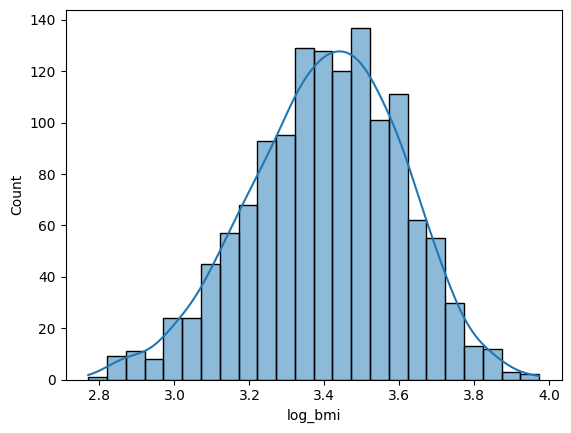

In [142]:
sns.histplot(data=df, x='log_bmi', kde=True)

In [147]:
df.groupby('region')['charges'].mean()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [187]:
df.groupby('region')['charges'].median()

,charges
region,
northeast,10057.652025
northwest,8965.795750
southeast,9294.131950
southwest,8798.593000


In [148]:
df[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [151]:
X_new = df.copy()
X_new.head()

,age,sex,bmi,children,smoker,region,charges,log_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,3.363149


In [152]:
X_new = pd.get_dummies(X_new, columns=['region'], drop_first=True)


In [153]:
X_new

,age,sex,bmi,children,smoker,charges,log_bmi,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,3.328627,False,False,True
1,18,male,33.770,1,no,1725.55230,3.519573,False,True,False
2,28,male,33.000,3,no,4449.46200,3.496508,False,True,False
3,33,male,22.705,0,no,21984.47061,3.122585,True,False,False
4,32,male,28.880,0,no,3866.85520,3.363149,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,3.433019,True,False,False
1334,18,female,31.920,0,no,2205.98080,3.463233,False,False,False
1335,18,female,36.850,0,no,1629.83350,3.606856,False,True,False
1336,21,female,25.800,0,no,2007.94500,3.250374,False,False,True


In [154]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,3.363149


In [157]:
df = df.drop('log_bmi', axis=1)

In [158]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [159]:
X2 = df.drop('charges', axis=1)
y2 = df['charges']



In [168]:
label_encoder_quiz = LabelEncoder()
X2['sex'] = label_encoder.fit_transform(X2['sex'])
X2['smoker'] = label_encoder.fit_transform(X2['smoker'])

In [170]:
X2 = pd.get_dummies(X2, columns=['region'], drop_first=True)

In [174]:
X2=X2.astype(float)

In [175]:
X2.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,0.0,1.0,0.0,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0,0.0,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0,0.0,1.0,0.0
3,33.0,1.0,22.705,0.0,0.0,1.0,0.0,0.0
4,32.0,1.0,28.880,0.0,0.0,1.0,0.0,0.0


In [176]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [177]:
linear_reg_quiz1 = LinearRegression()
linear_reg_quiz1.fit(X2_train, y2_train)

LinearRegression()

In [180]:
linear_reg_quiz1.intercept_

np.float64(-11039.238418561554)

In [181]:
y2_train_pred = linear_reg_quiz1.predict(X2_train)

In [182]:
r2_score(y2_train, y2_train_pred)

0.7545557492633161

In [183]:
y2_test_pred = linear_reg_quiz1.predict(X2_test)

In [184]:
r2_score(y2_test, y2_test_pred)

0.7405989316927213

In [185]:
np.sqrt(mean_squared_error(y2_test, y2_test_pred))

np.float64(6063.122656850449)

In [186]:
mean_absolute_error(y2_test, y2_test_pred)

4139.93206476601